<a href="https://colab.research.google.com/github/Pavani7849/Lakshmi_INFO5502_Summer2022/blob/main/in_class_exercise_06.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# SETTINGS

In [ ]:
# DataSet
dataset = "train_luc.csv"

# Outliers Switch & Proportion
remove_outliers = True
outlier_proportion = 1.5

# Columns to Drop
columns_to_drop = ['casual','registered'] # 


# Target Variable Assignment
target_name = 'count'

# Data Types & Conversion
data_types = {0:'int32', 1:'int64', 2:'float32', 3:'float64', 4:'str', 5:'object'}
features_to_convert = {}

# Output File
pickle_file = "pavani_assignment_model"

<br id='basiclibs'>

## BASIC LIBRARIES

In [ ]:
import numpy as np   # Numerical Analysis 

import pandas as pd  # Loading Dataset, STatistical information, Join DataFrames like in SQL, etc.,

import matplotlib.pyplot as plt # Plots/Charts

import seaborn as sns  # Plots/Charts

from scipy.stats import skew

import statistics as st

import os

In [ ]:
pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", None)

<hr style='height:10px'>

<br id='createdf'>

## CREATE DATAFRAME

In [ ]:
dateparse = lambda dates: pd.datetime.strptime(dates, '%Y-%m')

In [ ]:
dataset_path ="./data/" + dataset
df = pd.read_csv(dataset_path,parse_dates=['datetime'], index_col='datetime')

## Strip Trail Spacesin Column Names

In [ ]:
df.columns = [col.strip() for col in df.columns]

## Convert Data Types of Features

In [ ]:
if len(features_to_convert) != 0:
    for col, data_type in features_to_convert.items():
        df[col] = df[col].astype(data_type)

## Features to Drop

In [ ]:
if len(columns_to_drop) != 0:
    df = df.drop(columns_to_drop, axis=1)

<hr style='height:10px'>

<br id='basicinfo'>

## BASIC INFO

### Check the Shape (Rows * Columns) of DataFrame

In [ ]:
df.shape

(9174, 9)

### Check the Datatypes of Features

In [ ]:
df.dtypes, df.columns

(season          int64
 holiday         int64
 workingday      int64
 weather         int64
 temp          float64
 atemp         float64
 humidity        int64
 windspeed     float64
 count           int64
 dtype: object,
 Index(['season', 'holiday', 'workingday', 'weather', 'temp', 'atemp',
        'humidity', 'windspeed', 'count'],
       dtype='object'))

### Get the First 5 Rows of DataFrame

In [ ]:
df.head()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,count
datetime,,,,,,,,,
2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,16
2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,40
2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,32
2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,13
2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,1


### Get the Last 5 Rows of DataFrame

In [ ]:
df.tail()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,count
datetime,,,,,,,,,
2012-12-16 19:00:00,4,0,0,1,14.76,17.425,93,8.9981,109
2012-12-16 20:00:00,4,0,0,2,15.58,19.695,82,0.0000,122
2012-12-16 21:00:00,4,0,0,2,14.76,18.940,93,0.0000,106
2012-12-16 22:00:00,4,0,0,2,16.40,20.455,82,12.9980,89
2012-12-16 23:00:00,4,0,0,2,14.76,17.425,93,8.9981,33


### Categorical Features

In [ ]:
df.dtypes[df.dtypes=='object']

Series([], dtype: object)

### Get All Numerical Features from DataFrame

In [ ]:
df.dtypes[df.dtypes != 'object']

season          int64
holiday         int64
workingday      int64
weather         int64
temp          float64
atemp         float64
humidity        int64
windspeed     float64
count           int64
dtype: object

In [ ]:
np.array(df['count'])

array([ 16,  40,  32, ..., 106,  89,  33])

In [ ]:
df.head()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,count
datetime,,,,,,,,,
2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,16
2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,40
2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,32
2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,13
2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,1


In [ ]:
df[['Year', 'Month', 'Day','Day of Week', 'Hour', 'Minutes', 'Seconds']] = np.column_stack((df.index.year, df.index.month, df.index.day, df.index.dayofweek, df.index.hour, df.index.minute, df.index.second))

In [ ]:
df.head()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,count,Year,Month,Day,Day of Week,Hour,Minutes,Seconds
datetime,,,,,,,,,,,,,,,,
2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,16,2011,1,1,5,0,0,0
2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,40,2011,1,1,5,1,0,0
2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,32,2011,1,1,5,2,0,0
2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,13,2011,1,1,5,3,0,0
2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,1,2011,1,1,5,4,0,0


### Get all the Categorical Features

In [ ]:
[features for features in df.dtypes[df.dtypes=='object'].index]

[]

<hr style='height:10px'>

<br id='eda'>

## EXPLORATORY DATA ANALYSIS

### Distribution of Numerical Features

In [ ]:
[features for features in df.dtypes[df.dtypes != 'object'].index]

['season',
 'holiday',
 'workingday',
 'weather',
 'temp',
 'atemp',
 'humidity',
 'windspeed',
 'count',
 'Year',
 'Month',
 'Day',
 'Day of Week',
 'Hour',
 'Minutes',
 'Seconds']

In [ ]:
num_features = df.dtypes[df.dtypes != 'object'].index

In [ ]:
# Summarize numerical features
df[num_features].describe()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,count,Year,Month,Day,Day of Week,Hour,Minutes,Seconds
count,9174.000000,9174.000000,9174.000000,9174.000000,9174.000000,9174.000000,9174.000000,9174.000000,9174.000000,9174.000000,9174.000000,9174.000000,9174.000000,9174.000000,9174.0,9174.0
mean,2.505559,0.031284,0.678875,1.414868,20.130401,23.578433,61.715064,12.737931,190.581753,2011.501526,6.517114,8.498365,3.024090,11.537933,0.0,0.0
std,1.116618,0.174094,0.466934,0.635363,7.940504,8.617957,19.401829,8.199027,181.011530,0.500025,3.447047,4.611702,1.999882,6.915338,0.0,0.0
min,1.000000,0.000000,0.000000,1.000000,0.820000,0.760000,0.000000,0.000000,1.000000,2011.000000,1.000000,1.000000,0.000000,0.000000,0.0,0.0
25%,2.000000,0.000000,0.000000,1.000000,13.940000,16.665000,46.000000,7.001500,41.000000,2011.000000,4.000000,4.000000,1.000000,6.000000,0.0,0.0
50%,3.000000,0.000000,1.000000,1.000000,20.500000,24.240000,61.000000,11.001400,144.000000,2012.000000,7.000000,8.000000,3.000000,12.000000,0.0,0.0
75%,4.000000,0.000000,1.000000,2.000000,27.060000,31.060000,78.000000,16.997900,282.000000,2012.000000,10.000000,13.000000,5.000000,18.000000,0.0,0.0
max,4.000000,1.000000,1.000000,4.000000,41.000000,45.455000,100.000000,56.996900,977.000000,2012.000000,12.000000,16.000000,6.000000,23.000000,0.0,0.0


### Distribution of Categorical Features

In [ ]:
# cat_features = df.dtypes[df.dtypes == 'object'].index

In [ ]:
# df[cat_features].describe()

<hr style='height:10px'>

<br id='clean'>

## DATA CLEANING

<br id='neg'>

### Replace Negative Values with Zero

* Replaced Negative Values as Multinomial Naive Bayes and related Algorithms doesn't accept Negative Values

In [ ]:
num = df._get_numeric_data()

num[num < 0] = 0

### Drop Duplicates

In [ ]:
# Check the Number of Rows before Removing Duplicates
df.shape

(9174, 16)

In [ ]:
# Call drop_duplicates on DataFrame to remove Duplicates and Assign it back to DataFrame
df.drop_duplicates(inplace=True)

In [ ]:
# Check the Number of Rows after Removing Duplicates
df.shape

(9174, 16)

<br id='inf'>

### Replace "Inf" Values with it's mean value

In [ ]:
df = df.replace([np.inf, -np.inf], np.nan)   # replaced "Inf" and "-Inf" with "NaN"

### Remove Unwanted OUTLIERS !!!

### Get Feature and respective outliers count

In [ ]:
for feature in df.dtypes[df.dtypes != 'object'].index:
    count = []
    median = np.median(df[feature])
    upper_quartile = np.percentile(df[feature], 75)
    lower_quartile = np.percentile(df[feature], 25)
    iqr = upper_quartile - lower_quartile
    maxim = df[df[feature] <= upper_quartile + outlier_proportion * iqr][feature].max()
    minim = df[df[feature] >= lower_quartile - outlier_proportion * iqr][feature].min()
    for val in df[feature].values:
        if((val > maxim) or (val < minim)):
            count.append(val)
    if(len(count) > 0):
        print(feature, 'has ', str(len(count)), ' outliers. The Outliers are', ' : ', count)
        print('\n')

holiday has  287  outliers. The Outliers are  :  [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]


weather has  1  outliers. The Outliers are  :  [4]


windspeed has  184  outliers. The 

### Remove all the Outliers

In [ ]:
if remove_outliers:
    for feature in df.dtypes[df.dtypes != 'object'].index:
        count = []
        median = np.median(df[feature])
        upper_quartile = np.percentile(df[feature], 75)
        lower_quartile = np.percentile(df[feature], 25)
        iqr = upper_quartile - lower_quartile
        maxim = df[df[feature] <= upper_quartile + outlier_proportion * iqr][feature].max()
        minim = df[df[feature] >= lower_quartile - outlier_proportion * iqr][feature].min()
        for val in df[feature].values:
            if((val > maxim) or (val < minim)):
                df[feature] = df[df[feature] != val][feature]

### Check the Outliers again

In [ ]:
for feature in df.dtypes[df.dtypes!='object'].index:
    count = []
    median = np.median(df[feature])
    upper_quartile = np.percentile(df[feature], 75)
    lower_quartile = np.percentile(df[feature], 25)
    iqr = upper_quartile - lower_quartile
    maxim = df[df[feature] <= upper_quartile + outlier_proportion * iqr][feature].max()
    minim = df[df[feature] >= lower_quartile - outlier_proportion * iqr][feature].min()
    for val in df[feature].values:
        if((val > maxim) or (val < minim)):
            count.append(val)
    if(len(count) > 0):
        print(feature, 'has ', str(len(count)), ' outliers. The Outliers are', ' : ', count)
        print('\n')

<hr style='height:4px'>

### Remove NULLs

In [ ]:
# Check Columns that has NULLs
df.isnull().sum()

season           0
holiday        287
workingday       0
weather          1
temp             0
atemp            0
humidity         0
windspeed      184
count          258
Year             0
Month            0
Day              0
Day of Week      0
Hour             0
Minutes          0
Seconds          0
dtype: int64

### NUMERICAL

In [ ]:
for feature in df.select_dtypes(exclude=['object']):
    print(feature)

season
holiday
workingday
weather
temp
atemp
humidity
windspeed
count
Year
Month
Day
Day of Week
Hour
Minutes
Seconds


#### Fill all the NULLs in Numerical Features with fill (when Values in Numerical Features are Repetetive in Nature)

In [ ]:
for feature in df.isnull().sum()[df[df.dtypes.index].isnull().sum() > 0].index:
    if (np.dtype(df[feature]) == np.dtype('int64') or np.dtype(df[feature]) == np.dtype('float64')):
        if skew(df[feature]) <= 5.0:
            df[feature] = df[feature].mean()
        elif skew(df[feature]) >= 5.0 and skew(df[feature]) <= 10.0:
            df[feature] = df[feature].ffill()
            df[feature] = df[feature].bfill()
        else:
            df[feature] = df[feature].fillna(0)
    else:
        if len(df[feature]) / len(df[feature].unique())  <= 5.0:
            df[feature] = df[feature].fillna(st.mode(df[df[feature].notnull()][feature]))
        elif len(df[feature]) / len(df[feature].unique()) >= 5.0 and len(df[feature]) / len(df[feature].unique()) <= 10.0:
            df[feature] = df[feature].ffill()
            df[feature] = df[feature].bfill()
        else:
            df[feature] = df[feature].fillna('Missing')

#### Check NULLs again

In [ ]:
# Check Columns that has NULLs After dealing with NULL values in the respective Features
df.isnull().sum()

season         0
holiday        0
workingday     0
weather        0
temp           0
atemp          0
humidity       0
windspeed      0
count          0
Year           0
Month          0
Day            0
Day of Week    0
Hour           0
Minutes        0
Seconds        0
dtype: int64

<hr style='height:10px'>

<br id='featureengineering'>

## FEATURE ENGINEERING

### Label Encoding

In [ ]:
final_dict = {}

In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
for feature in df.dtypes[df.dtypes != 'object'].index:
    final_dict[feature] = [df[feature].dtype, min(df[feature]), max(df[feature]), np.mean(df[feature])]

In [ ]:
for feature in df.dtypes[df.dtypes=='object'].index:
    label_encoder  = LabelEncoder()
    feature_unique_values = list(df[feature].unique())
    df[feature] = label_encoder.fit_transform(df[feature])
    final_dict[feature] = ['object', feature_unique_values, label_encoder]

<hr style='height:10px'>

<br id='pipeline'>

## BUILD PIPELINE

### Create seperate objects for TARGET & INPUT features

In [ ]:
# Separate object for target feature
y = df[target_name]

# Separate Object for Input Features
X = df.drop(target_name, axis=1)

### Create TRAIN & TEST datasets

In [ ]:
# Function for splitting training and test set
from sklearn.model_selection import train_test_split

In [ ]:
# Split X and y into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1234)

### Regression Algorithms Imports

In [ ]:
# Import Elastic Net, Ridge Regression, and Lasso Regression
from sklearn.linear_model import ElasticNet, Ridge, Lasso

In [ ]:
# Import Random Forest and Gradient Boosted Trees
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor

In [ ]:
# Import Support Vector Regressor
from sklearn.svm import SVR

In [ ]:
# Import Decision Tree Regressor
from sklearn.tree import DecisionTreeRegressor

### Built Model PIPELINES

In [ ]:
# Function for creating model pipelines
from sklearn.pipeline import make_pipeline

In [ ]:
# For standardization
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [ ]:
# Create pipelines dictionary
pipeline_dict = {   'lasso' : make_pipeline(StandardScaler(), Lasso(random_state=123)),
                    'ridge' : make_pipeline(StandardScaler(), Ridge(random_state=123)),
                    'enet' :  make_pipeline(StandardScaler(), ElasticNet(random_state=123)),
                    'rf' :    make_pipeline(StandardScaler(), RandomForestRegressor(random_state=123)),
                    'gb' :    make_pipeline(StandardScaler(), GradientBoostingRegressor(random_state=123)),
                    'dtr' :   DecisionTreeRegressor(random_state=123)}

<hr style='height:10px'>

<br id='hyper'>

## Hyperparameters to TUNE

In [ ]:
# Lasso hyperparameters
lasso_hyperparameters = { 'lasso__alpha' : [0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1, 5, 10] }

In [ ]:
# Ridge hyperparameters 
ridge_hyperparameters = { 'ridge__alpha': [0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1, 5, 10] }

In [ ]:
# Elastic Net hyperparameters
enet_hyperparameters = { 'elasticnet__alpha': [0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1, 5, 10], 
                       'elasticnet__l1_ratio': [0.1, 0.3, 0.5, 0.7, 0.9]}

In [ ]:
# Random forest hyperparameters
rf_hyperparameters = { 
    'randomforestregressor__n_estimators' : [100, 200],
    'randomforestregressor__max_features': ['auto', 'sqrt', 0.33],
}

In [ ]:
# Boosted tree hyperparameters
gb_hyperparameters = {'gradientboostingregressor__n_estimators': [100, 200],
                     'gradientboostingregressor__learning_rate': [0.05, 0.1, 0.2],
                     'gradientboostingregressor__max_depth': [1, 3, 5]}

In [ ]:
# Support Vector Regressor hyperparameters
svr_hyperparameters = {'C': [0.5,1.0,2.0, 3.0],
                       'kernel': ['linear', 'rbf'],
                       'gamma':[0.02, 0.08,0.2,1.0]}

In [ ]:
# Decision Tree Regressor hyperparameters
dtr_hyperparameters = {'criterion': ['mse','mae', 'friedman_mse'],
                      'splitter': ['best', 'random'],
                      'max_depth':[2,4,6,8,10,None] ,
                      'random_state': [0]}

In [ ]:
# Create hyperparameters dictionary
hyperparameters = {
    'rf' : rf_hyperparameters,
    'gb' : gb_hyperparameters,
    'lasso' : lasso_hyperparameters,
    'ridge' : ridge_hyperparameters,
    'enet' : enet_hyperparameters,
    'svr': svr_hyperparameters,
    'dtr': dtr_hyperparameters
}

<hr style='height:10px'>

<br id='grid'>

## CONSTRUCT GRID FOR MODEL TRAINING - LASSO, RIDGE, ENET, RANDOM FOREST, GRADIENT BOOSTING AND DECISION TREE ALGORITHMS

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
fitted_models = {}

for name, pipeline in pipeline_dict.items():

    model = GridSearchCV(pipeline, hyperparameters[name], cv=10, n_jobs=-1)
    
    model.fit(X_train, y_train)
    
    fitted_models[name] = model
    
    print(name, 'has been fitted.')

lasso has been fitted.
ridge has been fitted.
enet has been fitted.
rf has been fitted.
gb has been fitted.
dtr has been fitted.


<hr style='height:10px'>

<br id='accuracy'>

## EVALUATE MODELS

In [ ]:
from sklearn.metrics import r2_score 
from sklearn.metrics import mean_absolute_error, mean_squared_error

### Loop that gives all the values of R^2, MAE, MSE & RMSE for all the Algorithms, we have fitted

In [ ]:
final_dict['model_score'] = []
i = 0
for name, model in fitted_models.items(): 
    pred_var = model.predict(X_test)
    print(name)
    print('-------')
    print('R^2: ', r2_score(y_test, pred_var))
    print('MAE: ', mean_absolute_error(y_test, pred_var))
    print('MSE: ', mean_squared_error(y_test, pred_var))
    print('RMSE: ', np.sqrt(mean_squared_error(y_test, pred_var)))
    final_dict['model_score'].append((i, name, r2_score(y_test, pred_var)))
    print('\n')
    i += 1

lasso
-------
R^2:  0.34728935138321115
MAE:  95.01274523789529
MSE:  16427.508524260116
RMSE:  128.16984249136033


ridge
-------
R^2:  0.34728819381173237
MAE:  94.9982092343633
MSE:  16427.53765817324
RMSE:  128.16995614485182


enet
-------
R^2:  0.3472904774427411
MAE:  95.0064437079147
MSE:  16427.48018344391
RMSE:  128.16973193170028


rf
-------
R^2:  0.824756837989694
MAE:  34.156149654921904
MSE:  4410.543238176534
RMSE:  66.41192090413087


gb
-------
R^2:  0.7716214996418633
MAE:  41.12657562151421
MSE:  5747.860509617144
RMSE:  75.81464574616928


dtr
-------
R^2:  0.6978350423419718
MAE:  48.338146374440896
MSE:  7604.927892901971
RMSE:  87.20623769491475




In [ ]:
best_model = final_dict['model_score'][max(final_dict['model_score'], key = lambda i : i[2])[0]][1]

In [ ]:
best_model

'rf'

### Plot a Graph on Predicted and Actual Values

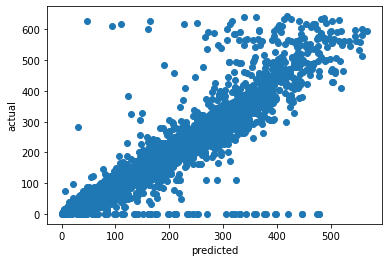

In [ ]:
model_pred = fitted_models[best_model].predict(X_test)
plt.scatter(model_pred, y_test)
plt.xlabel('predicted')
plt.ylabel('actual')
plt.show()

<hr style='height:10px'>

<br id='save'>

## PROJECT DELIVERY - PIPEPLINE AGAINST TEST DATASET

In [ ]:
import pickle

#### Save the Model

In [ ]:
final_dict['model'] = fitted_models[best_model].best_estimator_

In [ ]:
with open('./models/' + pickle_file + '.pkl', 'wb') as f:
    pickle.dump(final_dict, f)

In [ ]:
final_dict['model'].get_params()

{'memory': None,
 'randomforestregressor': RandomForestRegressor(n_estimators=200, random_state=123),
 'randomforestregressor__bootstrap': True,
 'randomforestregressor__ccp_alpha': 0.0,
 'randomforestregressor__criterion': 'squared_error',
 'randomforestregressor__max_depth': None,
 'randomforestregressor__max_features': 'auto',
 'randomforestregressor__max_leaf_nodes': None,
 'randomforestregressor__max_samples': None,
 'randomforestregressor__min_impurity_decrease': 0.0,
 'randomforestregressor__min_samples_leaf': 1,
 'randomforestregressor__min_samples_split': 2,
 'randomforestregressor__min_weight_fraction_leaf': 0.0,
 'randomforestregressor__n_estimators': 200,
 'randomforestregressor__n_jobs': None,
 'randomforestregressor__oob_score': False,
 'randomforestregressor__random_state': 123,
 'randomforestregressor__verbose': 0,
 'randomforestregressor__warm_start': False,
 'standardscaler': StandardScaler(),
 'standardscaler__copy': True,
 'standardscaler__with_mean': True,
 'standa

# Load Test Dataset, Build Pipeline and Prediction

In [ ]:
dateparse = lambda dates: pd.datetime.strptime(dates, '%Y-%m')
df_test = pd.read_csv('./data/test_luc.csv',parse_dates=['datetime'], index_col='datetime')

In [ ]:
df_test['Year'] = df_test.index.year
df_test['Month'] = df_test.index.month
df_test['Day'] = df_test.index.day
df_test['Day of Week'] = df_test.index.dayofweek
df_test['Hour'] = df_test.index.hour
df_test['Minute'] = df_test.index.minute
df_test['Seconds'] = df_test.index.second

In [ ]:
df_test.head()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,Year,Month,Day,Day of Week,Hour,Minute,Seconds
datetime,,,,,,,,,,,,,,,
2011-01-17 00:00:00,1,1,0,2,8.20,9.850,47,15.0013,2011,1,17,0,0,0,0
2011-01-17 01:00:00,1,1,0,2,8.20,9.850,44,12.9980,2011,1,17,0,1,0,0
2011-01-17 02:00:00,1,1,0,2,7.38,8.335,43,16.9979,2011,1,17,0,2,0,0
2011-01-17 03:00:00,1,1,0,2,7.38,9.090,43,12.9980,2011,1,17,0,3,0,0
2011-01-17 04:00:00,1,1,0,2,7.38,9.850,43,8.9981,2011,1,17,0,4,0,0


In [ ]:
df_test['Count Predicted'] = final_dict['model'].predict(df_test)

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- Minute
Feature names seen at fit time, yet now missing:
- Minutes

  warnings.warn(message, FutureWarning)


In [ ]:
df_test = df_test.reset_index()

In [ ]:
df_test.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,Year,Month,Day,Day of Week,Hour,Minute,Seconds,Count Predicted
0,2011-01-17 00:00:00,1,1,0,2,8.20,9.850,47,15.0013,2011,1,17,0,0,0,0,23.860
1,2011-01-17 01:00:00,1,1,0,2,8.20,9.850,44,12.9980,2011,1,17,0,1,0,0,16.410
2,2011-01-17 02:00:00,1,1,0,2,7.38,8.335,43,16.9979,2011,1,17,0,2,0,0,15.570
3,2011-01-17 03:00:00,1,1,0,2,7.38,9.090,43,12.9980,2011,1,17,0,3,0,0,8.035
4,2011-01-17 04:00:00,1,1,0,2,7.38,9.850,43,8.9981,2011,1,17,0,4,0,0,7.395


In [ ]:
df_test[['datetime', 'Count Predicted']].to_csv('final_submission.csv')